In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv("owid-co2-data.csv")
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.isnull().sum()

country                         0
year                            0
iso_code                     6661
population                   7949
gdp                         31972
                            ...  
share_global_other_co2      44137
total_ghg                   40374
total_ghg_excluding_lucf    40374
trade_co2                   42264
trade_co2_share             42265
Length: 74, dtype: int64

In [24]:
data.dropna(subset=['share_global_other_co2','iso_code','total_ghg','gdp','trade_co2'],inplace=True)

In [25]:
data.isnull().sum()

country                     0
year                        0
iso_code                    0
population                  0
gdp                         0
                           ..
share_global_other_co2      0
total_ghg                   0
total_ghg_excluding_lucf    0
trade_co2                   0
trade_co2_share             0
Length: 74, dtype: int64

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler=MinMaxScaler()
num_attrs = [ "population","co2"]

pipeline = ColumnTransformer([
                              ("numeric", minmax_scaler, num_attrs)
])

dataEs=data[data['country']=='Spain']
dataUSA=data[data['country']=='United States']
dataCh=data[data['country']=='China']

dataEs_norm = pipeline.fit_transform(dataEs)
dataUSA_norm = pipeline.fit_transform(dataUSA)
dataCh_norm = pipeline.fit_transform(dataCh)

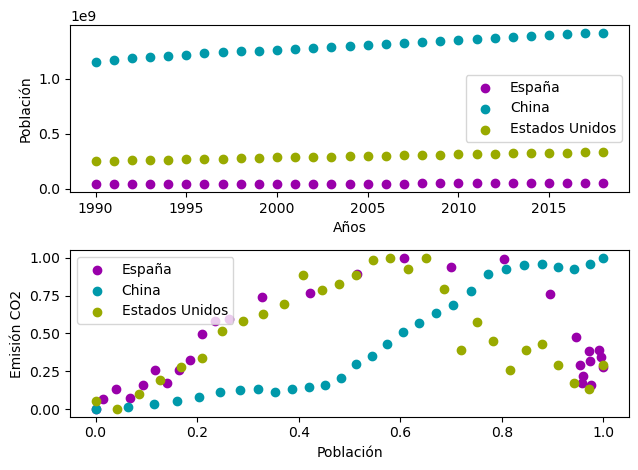

In [28]:
plt.subplot(2,1,1)
plt.scatter(dataEs['year'],dataEs['population'],label='España',c='#9900aa')
plt.scatter(dataCh['year'],dataCh['population'],label='China',c='#0099aa')
plt.scatter(dataUSA['year'],dataUSA['population'],label='Estados Unidos',c='#99aa00')
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()

plt.subplot(2,1,2)
plt.scatter(dataEs_norm[:,0],dataEs_norm[:,1],label='España',c='#9900aa')
plt.scatter(dataCh_norm[:,0],dataCh_norm[:,1],label='China',c='#0099aa')
plt.scatter(dataUSA_norm[:,0],dataUSA_norm[:,1],label='Estados Unidos',c='#99aa00')

plt.xlabel("Población")
plt.ylabel("Emisión CO2")
plt.legend()

plt.tight_layout()